<h1> Regressão Logística </h1>

Na Regressão Logística, queremos prever uma variável resposta categórica (<font  color=cyan>tarefas de classificação</font>), como por exemplo, prever o **país** ganhador da copa.

Ou seja, queremos encontrar uma relação **logística** entre uma variável target categórica (binary: 0 ou 1) e as variáveis explanatórias categóricas ou numéricas.

> Outros sinônimos são: model logit (lineariza o modelo com logarítimo), max entropy classifier, logistic model etc.

Reg. Linear vs Reg. Logística:

<img src="https://miro.medium.com/max/942/1*qPiAotA1w-3OIdx7GY-Rzw.png"><br>
[Source](https://medium.com/@gabriel.stankevix/regress%C3%A3o-log%C3%ADstica-em-r-e-python-pytools-9f4eba2061a1)

Diferentes curvas:

<img src="https://www.saedsayad.com/images/LogReg_1.png"><br>
[Source](https://www.saedsayad.com/logistic_regression.htm)

Extra: Vários algorítimos de Redes Neurais usam a regressão logística na última camada.

---
# Trabalhando com Regressão Logística em Python

<h4>Utilizando Regressão Logística para analisar a concessão de créditos bancários (Não ou Sim: [0,1])**negrito** em uma agência. 

## Imports

In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm

from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn                 import metrics

## Load

Dataset 'German Credit': [Source](https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv)

In [ ]:
pkg_dir = '/content'
 
df  = pd.read_csv(f'{pkg_dir}/credit_dataset.csv') 

In [ ]:
df.sample(5)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
586,1,1,18,3,4,5302,1,4,2,3,...,4,4,36,2,3,2,4,1,2,1
80,1,3,24,3,4,2022,1,2,4,1,...,4,3,37,2,2,1,3,1,2,1
671,1,2,18,2,3,1301,1,4,4,4,...,2,1,32,2,2,1,2,1,1,1
678,1,2,15,3,3,2728,4,3,4,3,...,2,1,35,1,2,2,3,1,2,1
642,1,1,24,3,1,6419,1,4,2,1,...,4,4,44,2,3,2,4,2,2,1


In [ ]:
# Shape
print( f'Number of rows: {df.shape[0]}' )
print( f'Number of columns: {df.shape[1]}' )

Number of rows: 1000
Number of columns: 21


In [ ]:
df.describe()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.292000,2.965000,3271.24800,1.874000,2.44600,2.973000,2.372000,...,2.845000,2.358000,35.54200,1.814000,1.928000,1.367000,2.904000,1.155000,1.404000,1.037000
std,0.458487,0.835589,12.058814,0.620581,0.971967,2822.75176,1.196476,1.10558,1.118715,1.067125,...,1.103718,1.050209,11.35267,0.389301,0.530186,0.482228,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,1.000000,1.000000,250.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,2.000000,1365.50000,1.000000,2.00000,2.000000,1.000000,...,2.000000,1.000000,27.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,3.000000,2319.50000,1.000000,2.00000,3.000000,3.000000,...,3.000000,2.000000,33.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.25000,3.000000,4.00000,4.000000,3.000000,...,4.000000,3.000000,42.00000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,3.000000,4.000000,18424.00000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,75.00000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000


### About Dataset: <br>

---
**Context**

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

>"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

---
The **predictors** that may potentially have any influence on Creditability:

- Account Balance: No account (1), None (No balance) (2), Some Balance (3)

- Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

- Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

- Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

- Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

- No of Credits at this bank: 1, More than 1

- Guarantor: None, Yes

- Concurrent Credits: Other Banks or Dept Stores, None

- ForeignWorker variable may be dropped from the study

- Purpose of Credit: New car, Used car, Home Related, Other

https://online.stat.psu.edu/stat508/resource/analysis/gcd

---
**Content**

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

---
**Acknowledgements**

https://online.stat.psu.edu/stat508/resource/analysis/gcd

Photo by Alice Pasqual on Unsplash

---
**Inspiration**

Unemployment in time of crisis.

## Functions

In [ ]:
def to_object_df( dataset, variable ):
  '''Function to transform variables misplaced as numeric
  into categorical variables'''

  to_char = lambda x: x.astype(str)
  dataset[ variable ] = dataset[ variable ].apply( to_char )

  return dataset

In [ ]:
def standardize_df( dataset, variable ):
  '''Function to normalize variables
  with StandarScaler'''

  standard_object = StandardScaler()
  dataset[ variable ] = standard_object.fit_transform( dataset[ variable ] )
  
  return dataset

In [ ]:
def freq( x: pd.Series, plot = False ):
  '''Function to show the percentage of
  values in the target variable'''
  
  contagem = x.value_counts()
  percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
  res = pd.DataFrame({'values': x.unique(), 'count values': contagem, 'percentual': percentual})
  if plot:
    sns.countplot(x)
    plt.show()
  
  return res

In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
  '''Function to plot the ROC Curve
  for the True Positive Rate and
  the False Positive Rate'''

  fpr, tpr, _ = roc_curve(y_true, y_score)
  plt.figure(figsize=figsize)
  auc_value = roc_auc_score(y_true, y_score)
  plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

## Pre Process

**Note**:<br>
This dataset has no NA's nor outliers!

In [ ]:
df.isnull().sum()

credit.rating                     0
account.balance                   0
credit.duration.months            0
previous.credit.payment.status    0
credit.purpose                    0
credit.amount                     0
savings                           0
employment.duration               0
installment.rate                  0
marital.status                    0
guarantor                         0
residence.duration                0
current.assets                    0
age                               0
other.credits                     0
apartment.type                    0
bank.credits                      0
occupation                        0
dependents                        0
telephone                         0
foreign.worker                    0
dtype: int64

In [ ]:
df.dtypes

credit.rating                       int64
account.balance                     int64
credit.duration.months            float64
previous.credit.payment.status      int64
credit.purpose                      int64
credit.amount                     float64
savings                             int64
employment.duration                 int64
installment.rate                    int64
marital.status                      int64
guarantor                           int64
residence.duration                  int64
current.assets                      int64
age                               float64
other.credits                       int64
apartment.type                      int64
bank.credits                        int64
occupation                          int64
dependents                          int64
telephone                           int64
foreign.worker                      int64
dtype: object

---
Apply normalization for 3 numeric variables

In [ ]:
standardize_df( df, [ 'age', 'credit.duration.months', 'credit.amount' ] )

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,-0.240857,3,2,-0.787657,1,1,4,1,...,4,2,-1.281573,2,1,1,3,1,1,1
1,1,1,-0.987573,3,4,-0.167384,1,2,2,3,...,2,1,0.040363,2,1,2,3,2,1,1
2,1,2,-0.738668,2,4,-0.861381,2,3,2,1,...,4,1,-1.105315,2,1,1,2,1,1,1
3,1,1,-0.738668,3,4,-0.407341,1,2,3,3,...,2,1,0.304750,2,1,2,2,2,1,2
4,1,1,-0.738668,3,4,-0.389974,1,2,4,3,...,4,2,0.216621,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0.256953,2,3,-0.455191,1,2,2,3,...,4,1,-1.281573,2,1,1,2,2,1,1
996,0,1,0.256953,2,4,-0.343187,1,4,4,3,...,1,1,0.833525,2,2,1,3,1,1,1
997,0,3,0.008048,3,4,3.334852,4,4,4,3,...,4,4,-0.488411,2,3,1,4,1,2,1
998,0,2,-0.738668,2,3,1.133062,4,1,2,3,...,1,4,1.450428,2,2,1,4,1,2,1


---
Transform misplace numeric columns as categorical

In [ ]:
list_transform_categorical = [ 'credit.rating', 'account.balance', 'previous.credit.payment.status',
                               'credit.purpose', 'savings', 'employment.duration',
                               'installment.rate', 'marital.status', 'guarantor', 
                               'residence.duration', 'current.assets',  'other.credits', 'apartment.type', 'bank.credits', 'occupation', 
                               'dependents', 'telephone', 'foreign.worker' ]

to_object_df( df, list_transform_categorical )

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,-0.240857,3,2,-0.787657,1,1,4,1,...,4,2,-1.281573,2,1,1,3,1,1,1
1,1,1,-0.987573,3,4,-0.167384,1,2,2,3,...,2,1,0.040363,2,1,2,3,2,1,1
2,1,2,-0.738668,2,4,-0.861381,2,3,2,1,...,4,1,-1.105315,2,1,1,2,1,1,1
3,1,1,-0.738668,3,4,-0.407341,1,2,3,3,...,2,1,0.304750,2,1,2,2,2,1,2
4,1,1,-0.738668,3,4,-0.389974,1,2,4,3,...,4,2,0.216621,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0.256953,2,3,-0.455191,1,2,2,3,...,4,1,-1.281573,2,1,1,2,2,1,1
996,0,1,0.256953,2,4,-0.343187,1,4,4,3,...,1,1,0.833525,2,2,1,3,1,1,1
997,0,3,0.008048,3,4,3.334852,4,4,4,3,...,4,4,-0.488411,2,3,1,4,1,2,1
998,0,2,-0.738668,2,3,1.133062,4,1,2,3,...,1,4,1.450428,2,2,1,4,1,2,1


---
Check new df types

In [ ]:
df.dtypes

credit.rating                      object
account.balance                    object
credit.duration.months            float64
previous.credit.payment.status     object
credit.purpose                     object
credit.amount                     float64
savings                            object
employment.duration                object
installment.rate                   object
marital.status                     object
guarantor                          object
residence.duration                 object
current.assets                     object
age                               float64
other.credits                      object
apartment.type                     object
bank.credits                       object
occupation                         object
dependents                         object
telephone                          object
foreign.worker                     object
dtype: object

## Logistic Regression Model

Target Variable Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


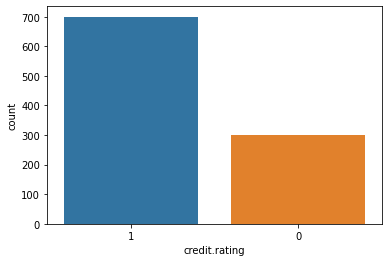

,values,count values,percentual
1,1,700,70.0
0,0,300,30.0


In [ ]:
freq( df['credit.rating'], plot = True )

In [ ]:
# explanatory_vars = df.loc[ : , df.columns != 'credit.rating']

# model = smf.glm( formula = f'credit.rating ~ {" + ".join(explanatory_vars.columns)}', data = df,
#                  family = sm.families.Binomial() ).fit()

# print( model.summary() )

In [ ]:
# Creating Model
logisticRegr  = LogisticRegression( penalty = 'none', solver = 'newton-cg')

In [ ]:
# Setting X and y

# Encoding for categorical vars 
explanatory_vars = df.loc[ : , df.columns != 'credit.rating'].columns.values
X = pd.get_dummies( df[explanatory_vars], drop_first = True )
y = pd.get_dummies( df['credit.rating'], drop_first = True )

In [ ]:
X.head()

,credit.duration.months,credit.amount,age,account.balance_2,account.balance_3,previous.credit.payment.status_2,previous.credit.payment.status_3,credit.purpose_2,credit.purpose_3,credit.purpose_4,...,other.credits_2,apartment.type_2,apartment.type_3,bank.credits_2,occupation_2,occupation_3,occupation_4,dependents_2,telephone_2,foreign.worker_2
0,-0.240857,-0.787657,-1.281573,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,-0.987573,-0.167384,0.040363,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
2,-0.738668,-0.861381,-1.105315,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,-0.738668,-0.407341,0.304750,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,1
4,-0.738668,-0.389974,0.216621,0,0,0,1,0,0,1,...,0,1,0,1,1,0,0,0,0,1


In [ ]:
y.head()

,1
0,1
1,1
2,1
3,1
4,1


---
Train and Test Split

In [ ]:
# Split train with 70%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42 )

---
Training

In [ ]:
logisticRegr.fit( X_train, y_train )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
print( logisticRegr.coef_ )

[[-0.33931842 -0.43000875  0.14070516  0.56630306  1.61429689  0.89499447
   1.47939259 -1.22562303 -1.33233118 -1.77198866  0.34673053  1.0342752
   0.95596161  0.32050462  0.54009841  0.18903436 -0.11274414 -0.34409141
  -0.88035991  0.5714138   0.09342858  0.16792768 -0.49242363 -0.27547654
  -0.19435296  0.07789127 -0.12797211 -0.65748333  0.0611656   0.44386462
   0.43023595 -0.00875949  0.43368311  0.29082029  0.42691999 -0.18258572
   0.41667018  1.79747016]]


---
Predicting

In [ ]:
predictions = logisticRegr.predict( X_test )

## Model Performance

In [ ]:
score = logisticRegr.score( X_test, y_test )
print( score )

0.7666666666666667


---
Confusion Matrix with Seaborn

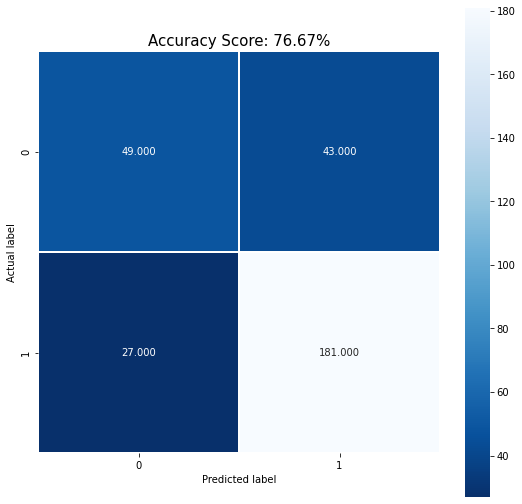

In [ ]:
#  Confusion Matrix
cm = metrics.confusion_matrix( y_test, predictions )

# Plot
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {score*100:.2f}%'
plt.title(all_sample_title, size = 15);

---
Other Metrics besides Accuracy 

In [ ]:
print( classification_report( y_test, predictions ) )

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        92
           1       0.81      0.87      0.84       208

    accuracy                           0.77       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.76      0.77      0.76       300



---
ROC Curve

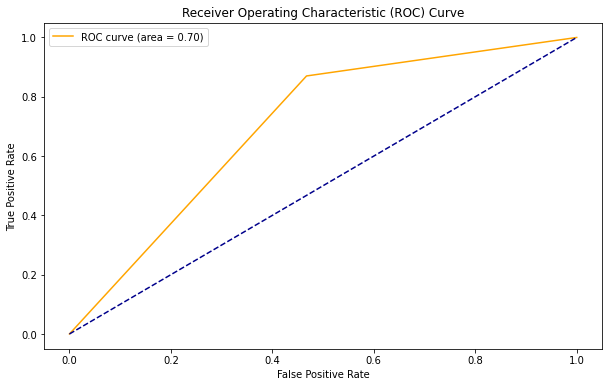

In [ ]:
plot_roc_curve( y_test, predictions )

## Predicting for 4 new clientes with 4 columns only

In [ ]:
# 4 new clients data
df_new_account_balance = (1, 3, 2, 2)
df_new_clients_credit_purpose = (4, 2, 4, 2)
df_new_clients_employment_duration = (3, 4, 1, 1)
df_new_clients_savings = (2, 3, 1, 2)

# Transform to DataFrame
df_new = pd.DataFrame({ 'account.balance': df_new_account_balance,
                        'credit.purpose': df_new_clients_credit_purpose,
                        'employment.duration': df_new_clients_employment_duration,
                        'savings': df_new_clients_savings })
df_new

,account.balance,credit.purpose,employment.duration,savings
0,1,4,3,2
1,3,2,4,3
2,2,4,1,1
3,2,2,1,2


In [ ]:
# Pre process for new data
list_transform_categorical_new = [ 'account.balance',
                                   'credit.purpose',
                                   'employment.duration',
                                   'savings' ]

to_object_df( df_new, list_transform_categorical_new )

,account.balance,credit.purpose,employment.duration,savings
0,1,4,3,2
1,3,2,4,3
2,2,4,1,1
3,2,2,1,2


In [ ]:
# Retraining with only 4 choosen columns

df_filtered = df[[ 'account.balance',
                   'credit.purpose',
                   'employment.duration',
                   'savings',
                   'credit.rating' ]]

# New model
logisticRegr_new = LogisticRegression( penalty = 'none', solver = 'newton-cg')

# X and y
explanatory_vars_new = df_filtered.loc[ : , df_filtered.columns != 'credit.rating'].columns.values
X_new = pd.get_dummies( df_filtered[explanatory_vars_new], drop_first = True )
y_new = df_filtered['credit.rating'].values

# Train test split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( X_new, y_new,
                                                                    test_size = 0.3,
                                                                    random_state = 42 )

# Train
logisticRegr_new.fit( X_new_train, y_new_train )

LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
# Predict new clients

# X and y
explanatory_vars_new = df_new.columns.values
X_df_new = pd.get_dummies( df_new[explanatory_vars_new], drop_first = True )


predictions_new = logisticRegr_new.predict( X_df_new )

In [ ]:
X_df_new

,account.balance_2,account.balance_3,credit.purpose_4,employment.duration_3,employment.duration_4,savings_2,savings_3
0,0,0,1,1,0,1,0
1,0,1,0,0,1,0,1
2,1,0,1,0,0,0,0
3,1,0,0,0,0,1,0


In [ ]:
predictions_new

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], d